In [26]:
import matplotlib.pyplot as plt
import random
import json
import geopandas

from matplotlib.colors import ListedColormap
from gerrychain import Partition, Graph
from gerrychain.graph.geo import reprojected

In [22]:

districtr_colors = [
    "#0099cd",
    "#ffca5d",
    "#00cd99",
    "#99cd00",
    "#cd0099",
    "#9900cd",
    "#8dd3c7",
    "#bebada",
    "#fb8072",
    "#80b1d3",
    "#fdb462",
    "#b3de69",
    "#fccde5",
    "#bc80bd",
    "#ccebc5",
    "#ffed6f",
    "#ffffb3",
    "#a6cee3",
    "#1f78b4",
    "#b2df8a",
    "#33a02c",
    "#fb9a99",
    "#e31a1c",
    "#fdbf6f",
    "#ff7f00",
    "#cab2d6",
    "#6a3d9a",
    "#b15928",
    "#64ffda",
    "#00B8D4",
    "#A1887F",
    "#76FF03",
    "#DCE775",
    "#B388FF",
    "#FF80AB",
    "#D81B60",
    "#26A69A",
    "#FFEA00",
    "#6200EA"
]

def districtr_cmap(number_of_colors=len(districtr_colors)):
    return ListedColormap(districtr_colors[:number_of_colors])

In [18]:
gdf = geopandas.read_file("../shapefiles/chicago_precincts_economic.shp").set_index("JOINID")
projected_df = reprojected(gdf)
graph = Graph.from_geodataframe(gdf)

In [107]:
def plot_plan(partition, save_to_file=None, df=projected_df):
    partition.plot(df, cmap=districtr_cmap(len(partition)), figsize=(10,12), edgecolor=(1, 1, 1, 0.2), linewidth=0.1, alpha=0.95)
    plt.axis("off")
    if save_to_file is not None:
        plt.savefig(save_to_file)

In [111]:
def load_plan(ensemble, number, graph=graph):
    with open(f"../ensembles/{ensemble}/assignments/assignment{number}.json") as f:
        assignment = json.load(f)
    return Partition(graph, assignment)

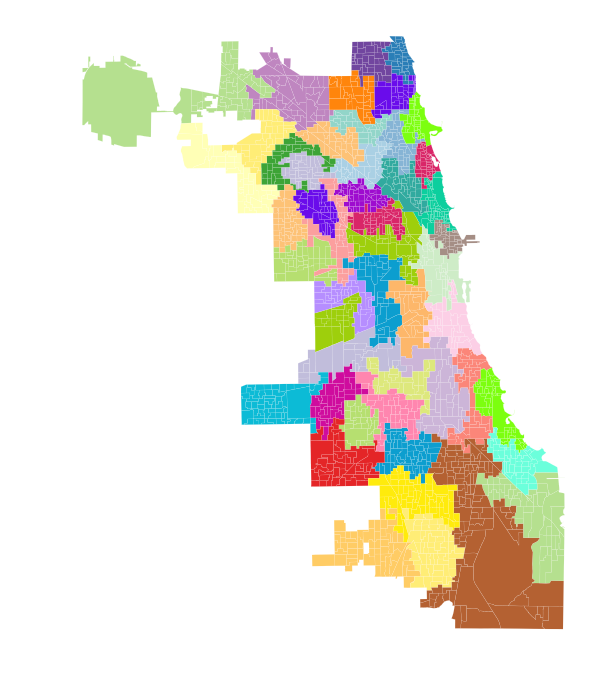

In [28]:
plot_plan(load_plan("prec50", 55139), save_to_file="../figures/55139.png")
plt.show()

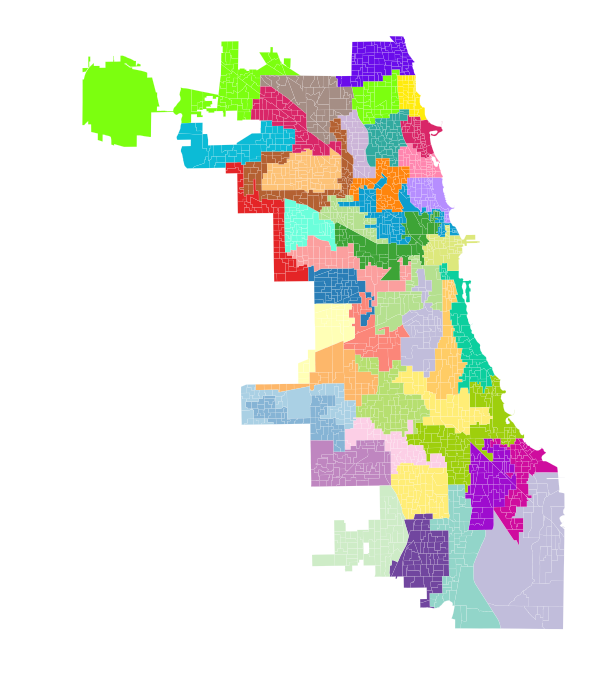

In [29]:
current_partition = Partition(graph, gdf["ward"])
plot_plan(current_partition, save_to_file="../figures/current_wards.png")

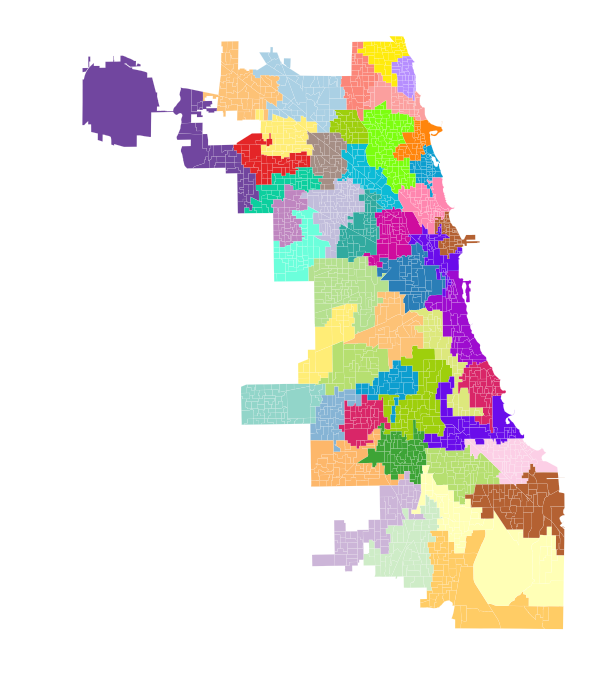

In [30]:
plot_plan(load_plan("prec50", 4287), save_to_file="../figures/4287.png")

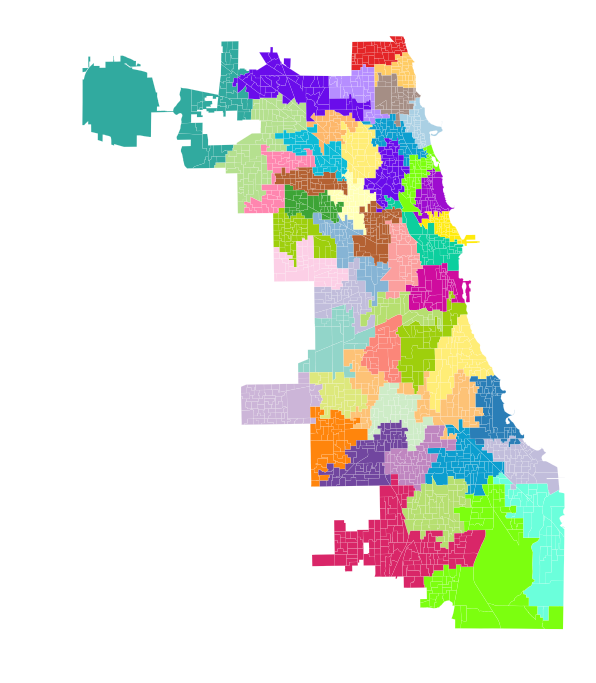

In [31]:
plot_plan(load_plan("prec50", 12816), save_to_file="../figures/12816.png")

In [104]:
plans = [55213, 205, 86660, 8178, 41323, 8698]

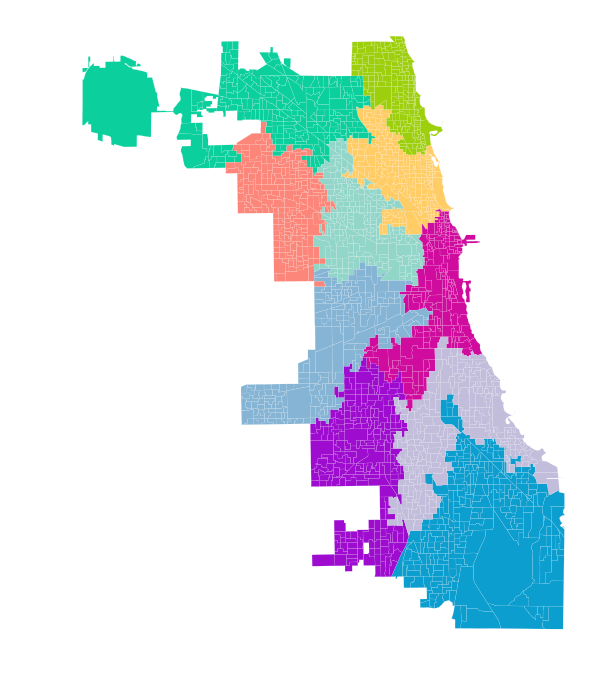

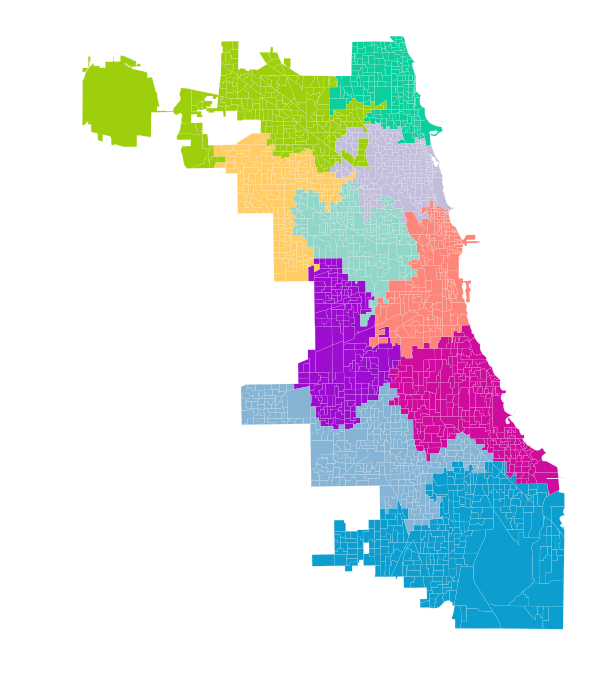

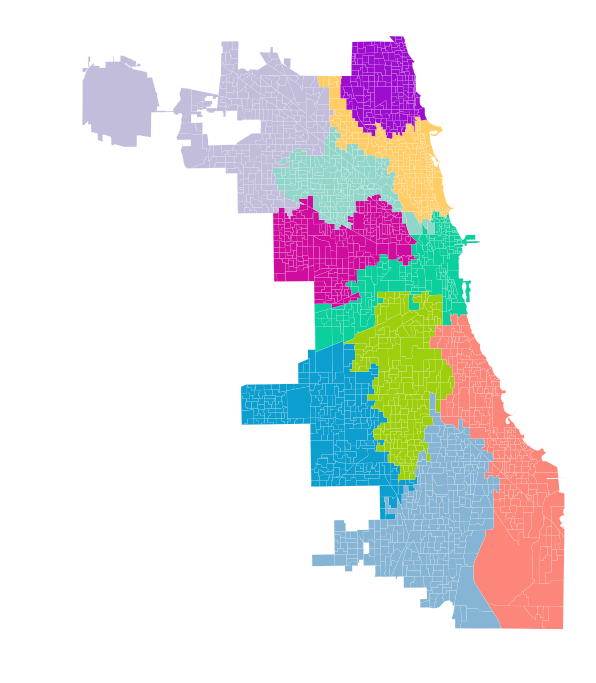

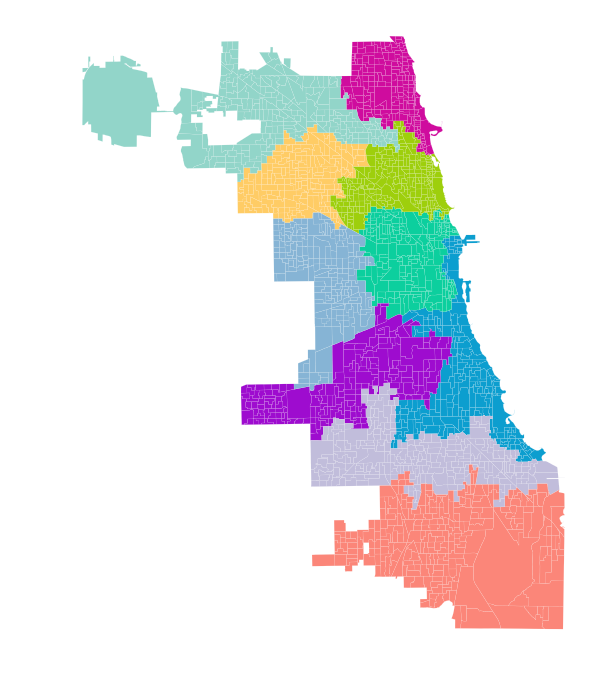

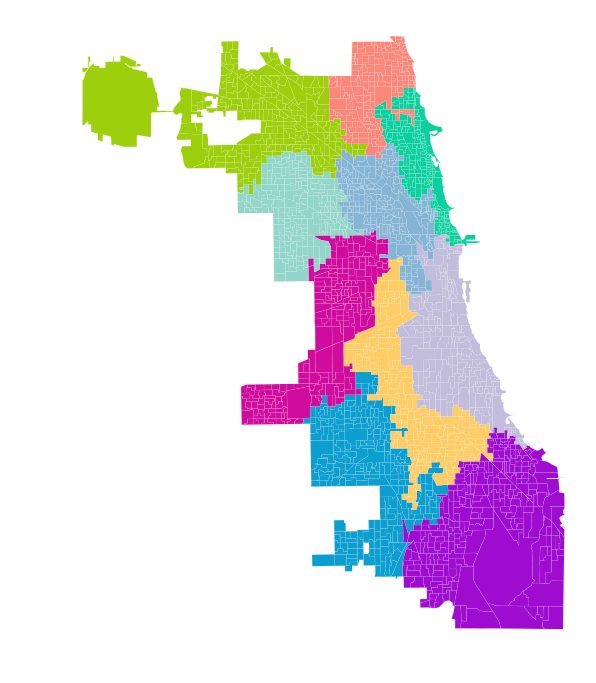

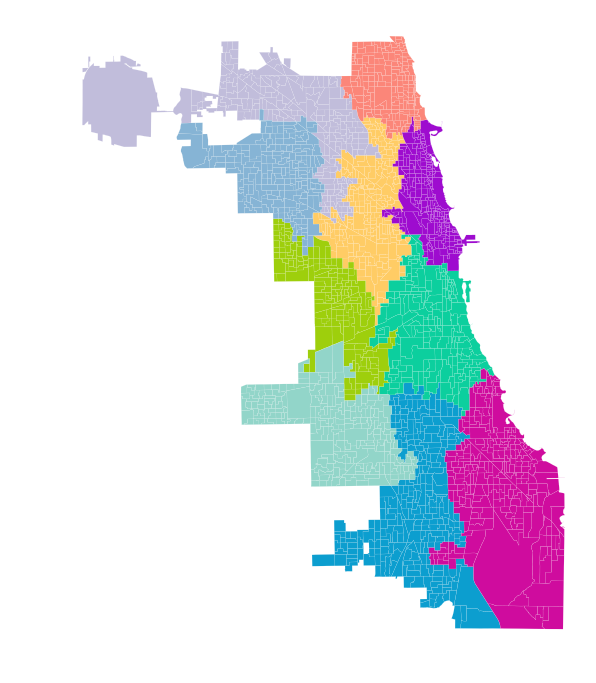

In [108]:
for plan in plans:
    plot_plan(load_plan("prec10", plan), save_to_file=f"../figures/prec10_{plan}.png")

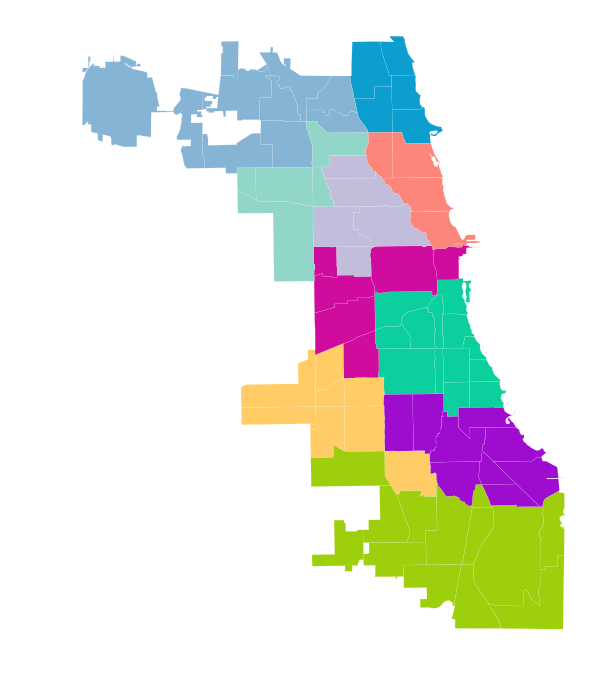

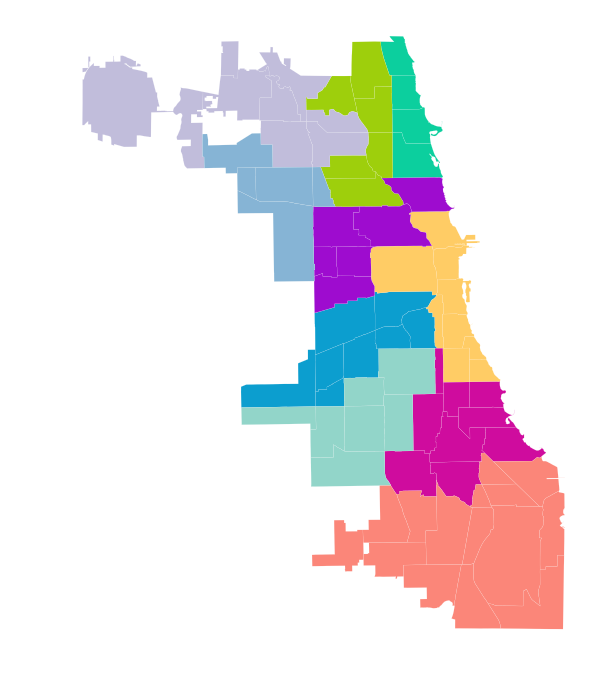

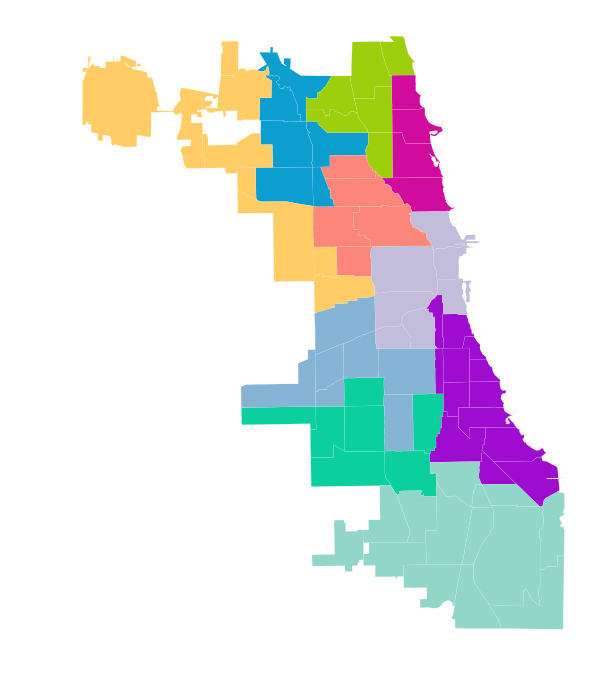

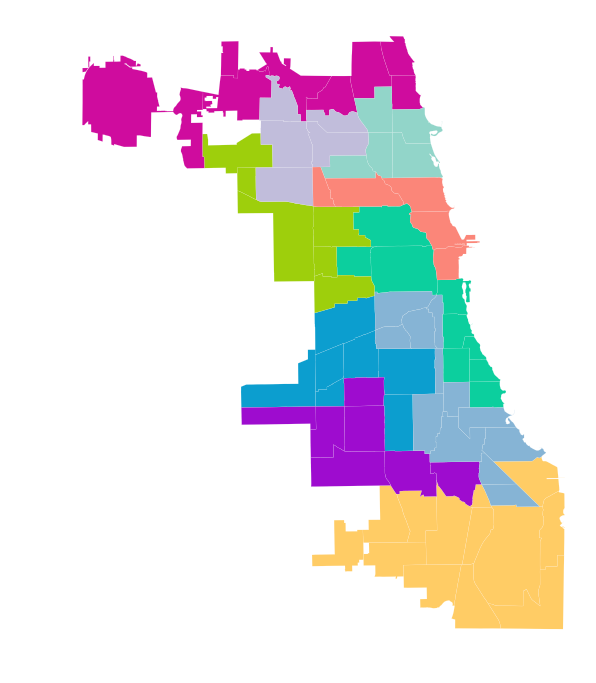

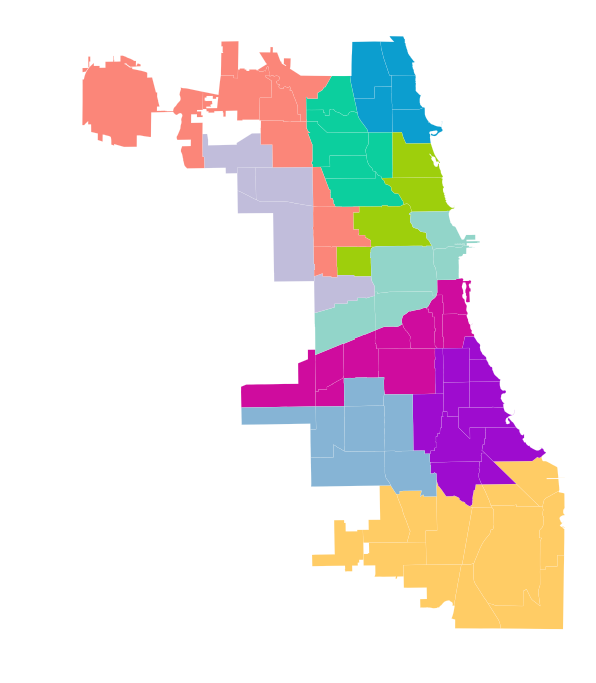

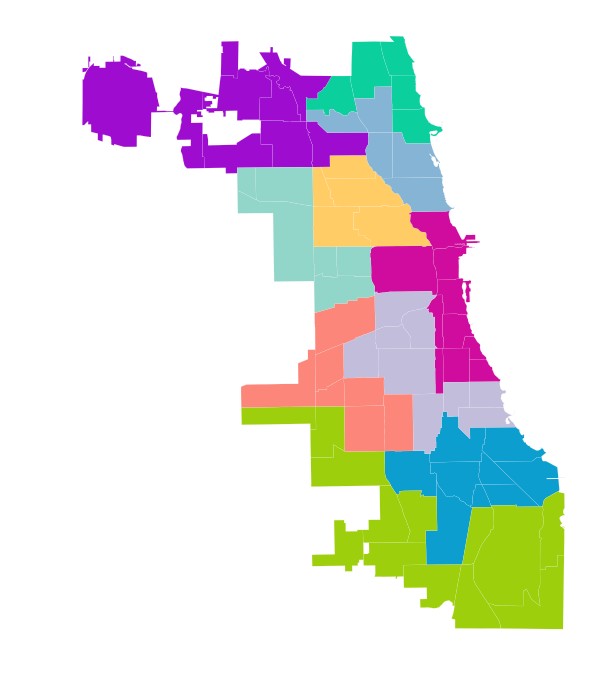

In [112]:
ca10_plans = [25218, 5848, 87557, 937, 1042, 5304]
projected_cas = reprojected(cas.set_index("area_num_1"))
ca_graph = Graph.from_geodataframe(projected_cas)

for plan in ca10_plans:
    plot_plan(load_plan("ca10", plan, graph=ca_graph), save_to_file=f"../figures/ca10_{plan}.png", df=projected_cas)